In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/120
402/402 - 2s - loss: 6603.4868 - 2s/epoch - 5ms/step
Epoch 2/120
402/402 - 1s - loss: 6057.7241 - 597ms/epoch - 1ms/step
Epoch 3/120
402/402 - 1s - loss: 5363.7930 - 617ms/epoch - 2ms/step
Epoch 4/120
402/402 - 1s - loss: 4791.7969 - 607ms/epoch - 2ms/step
Epoch 5/120
402/402 - 1s - loss: 4319.9790 - 579ms/epoch - 1ms/step
Epoch 6/120
402/402 - 1s - loss: 3916.2776 - 579ms/epoch - 1ms/step
Epoch 7/120
402/402 - 1s - loss: 3562.5361 - 602ms/epoch - 1ms/step
Epoch 8/120
402/402 - 1s - loss: 3246.1030 - 566ms/epoch - 1ms/step
Epoch 9/120
402/402 - 1s - loss: 2958.1423 - 595ms/epoch - 1ms/step
Epoch 10/120
402/402 - 1s - loss: 2695.4299 - 552ms/epoch - 1ms/step
Epoch 11/120
402/402 - 1s - loss: 2453.9956 - 578ms/epoch - 1ms/step
Epoch 12/120
402/402 - 1s - loss: 2231.5623 - 574ms/epoch - 1ms/step
Epoch 13/120
402/402 - 1s - loss: 2025.8884 - 588ms/e

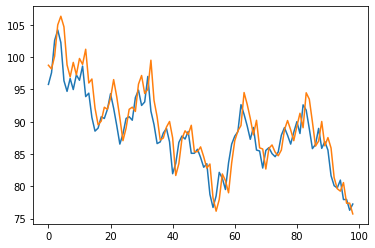

In [6]:


drive.mount("/content/gdrive")
dataset_dir = '/content/gdrive/My Drive/week 4/LSTM_train_week4.csv'
# import libraries


# import the csv library
import csv

# load the dataset
# df = pd.read_csv(dataset_dir)


import tensorflow as tf
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv(dataset_dir)

# Extract the date and price columns
data = data[[ 'Price']]

# Split the data into training and test sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size], data[train_size:len(data)]

# Preprocess the data by reshaping it and scaling the values
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train_data.values, look_back)
testX, testY = create_dataset(test_data.values, look_back)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

# Define the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(8, input_shape=(1, look_back)))
model.add(tf.keras.layers.Dense(1))

# Compile the model with the mean squared error loss function and the Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(trainX, trainY, epochs=120, batch_size=1, verbose=2)

# Evaluate the model using the RMSE metric
predictions = model.predict(testX)
rmse = np.sqrt(mean_squared_error(testY, predictions))
print('Test RMSE:', rmse)

# Make predictions for the next 30 days
next_30_days = model.predict(testX[-30:])

# Visualize the results
plt.plot(testY)
plt.plot(predictions)
plt.show()


predictions_df = pd.DataFrame(next_30_days, columns=['Predicted Price'])


d2 = pd.read_csv(dataset_dir)

# Convert the Date column to a datetime type
d2['Date'] = pd.to_datetime(d2['Date'])

# Add a column for the date
predictions_df['Date'] = pd.date_range(start=d2['Date'].iloc[-1] + pd.Timedelta(1, 'D'), periods=len(predictions_df), freq='D')



# # Add a column for the date
# predictions_df['Date'] = pd.date_range(start=d2['Date'].iloc[-1] + 1, periods=len(predictions_df), freq='D')

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions_price.csv', index=False)









